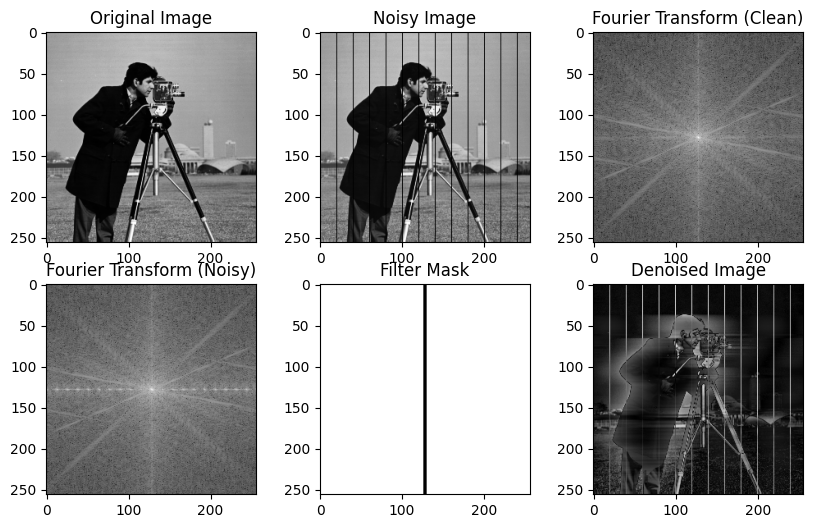

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_periodic_noise(image, interval=20):
    noisy_image = image.copy()
    for i in range(0, noisy_image.shape[1], interval):
        noisy_image[:, i] = 0  # Add vertical black stripes
    return noisy_image

# Load the image
image = cv2.imread("./cameraman.tif", cv2.IMREAD_GRAYSCALE)
noisy_image = add_periodic_noise(image)

# Compute Fourier Transform
f = np.fft.fft2(image)
f_shift = np.fft.fftshift(f)
spectrum_clean = np.log1p(np.abs(f_shift))

f_noisy = np.fft.fft2(noisy_image)
f_noisy_shift = np.fft.fftshift(f_noisy)
spectrum_noisy = np.log1p(np.abs(f_noisy_shift))

# High-Pass Filtering to Remove Noise
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols), np.uint8)
mask[:, ccol-2:ccol+2] = 0  # Remove vertical noise frequencies

filtered = f_noisy_shift * mask
inv_shift = np.fft.ifftshift(filtered)
reconstructed = np.fft.ifft2(inv_shift)
reconstructed = np.abs(reconstructed)

# Plot Results
plt.figure(figsize=(10, 6))
plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy Image')
plt.subplot(233), plt.imshow(spectrum_clean, cmap='gray'), plt.title('Fourier Transform (Clean)')
plt.subplot(234), plt.imshow(spectrum_noisy, cmap='gray'), plt.title('Fourier Transform (Noisy)')
plt.subplot(235), plt.imshow(mask, cmap='gray'), plt.title('Filter Mask')
plt.subplot(236), plt.imshow(reconstructed, cmap='gray'), plt.title('Denoised Image')
plt.show()
